In [ ]:
import numpy as np

In [ ]:
import time

In [ ]:
import pandas as pd

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("heptapod/titanic")

print("Path to dataset files:", path)


Using Colab cache for faster access to the 'titanic' dataset.
Path to dataset files: /kaggle/input/titanic


In [ ]:
df = pd.read_csv("/content/train.csv")

In [ ]:
df.shape
df.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


In [ ]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
df.dtypes

,0
PassengerId,int64
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64


In [ ]:
df['Sex'].unique()

array(['male', 'female'], dtype=object)

In [ ]:
# df['Error'] = 0,1 won't work because should be only 1 character

In [ ]:
df['msex'] = (df['Sex'] == 'male').astype(int)
df.drop(columns='Sex', inplace=True)
df.head(3)

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,msex
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0


Ex: Edit the dataframe so instead of the embarked column we will have 3 columns named Cherbourg, Queenstown, Southampton and each row will have 1 where it embarked

In [ ]:
df['Cherbourg'] = (df['Embarked'] == 'C').astype(int)
df['Queenstown'] = (df['Embarked'] == 'Q').astype(int)
df['Southampton'] = (df['Embarked'] == 'S').astype(int)
df.drop(columns = 'Embarked', inplace=True)

In [ ]:
df

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,msex,Cherbourg,Queenstown,Southampton
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,NaN,1,0,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,B42,0,0,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",NaN,1,2,W./C. 6607,23.4500,NaN,0,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,C148,1,1,0,0


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
df['Pclass'].unique()

array([3, 1, 2])

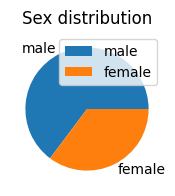

In [ ]:
df['msex'].value_counts() #tells how much we have from each value
plt.figure(figsize=(2,2)) # has to be before creating the graph
plt.pie(df['msex'].value_counts(), labels=('male', 'female'))
plt.legend(loc='upper right')
plt.title("Sex distribution")
plt.show()

Ex1: What precentage from the females survived from all the females ? show a pie chart that answer the question

Text(0.5, 1.0, 'Females survived distribution')

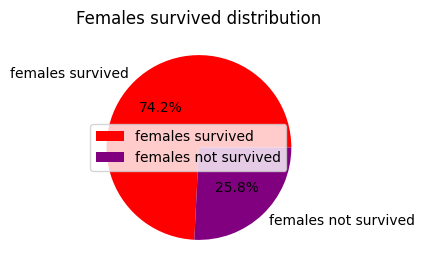

In [ ]:
f_df = df[df['msex'] == 0]
f_df['Survived'].value_counts()

plt.figure(figsize=(4, 3))

plt.pie(f_df['Survived'].value_counts(), labels=('females survived', 'females not survived'), autopct='%1.1f%%',
        colors=('red', 'purple'))
plt.legend() #(loc='upper right')
plt.title("Females survived distribution")

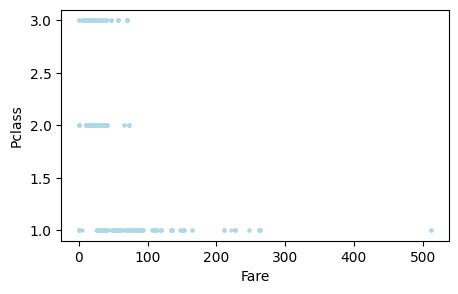

In [ ]:
plt.figure(figsize=(5,3))

plt.scatter(x=df['Fare'], y=df['Pclass'], s=4, color='lightblue')

plt.xlabel("Fare")
plt.ylabel("Pclass")
plt.show()

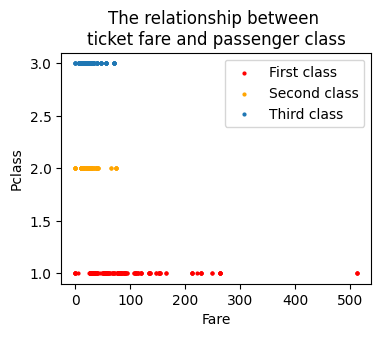

In [ ]:
plt.figure(figsize=(4,3))

first_class = df[df['Pclass'] == 1]
second_class = df[df["Pclass"] == 2]
third_class = df[df['Pclass'] == 3]

plt.scatter(x=first_class['Fare'], y=first_class['Pclass'], s=4, color='red', label='First class')
plt.scatter(x=second_class['Fare'], y=second_class['Pclass'], s=4, color='orange', label='Second class')
plt.scatter(x=third_class['Fare'], y=third_class['Pclass'], s=4, label='Third class')

plt.title("The relationship betwee`n \nticket fare and passenger class")
plt.xlabel("Fare")
plt.ylabel("Pclass")
plt.legend() #mikra

plt.show()

<Axes: xlabel='Pclass', ylabel='Fare'>

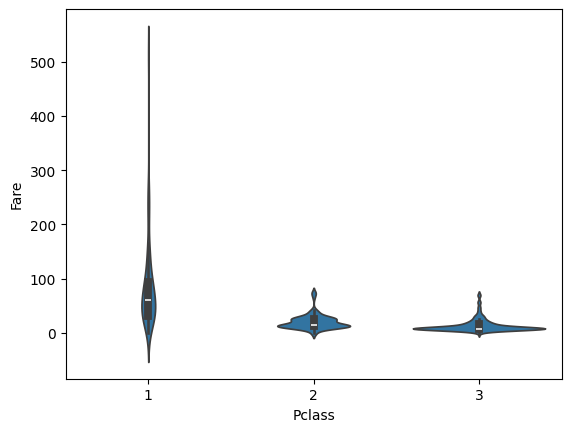

In [ ]:
sns.violinplot(x=df['Pclass'], y=df['Fare'])

Ex: plot the seaborn violinplot to only class 2 and 3

/tmp/ipython-input-2152169362.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend() #mikra


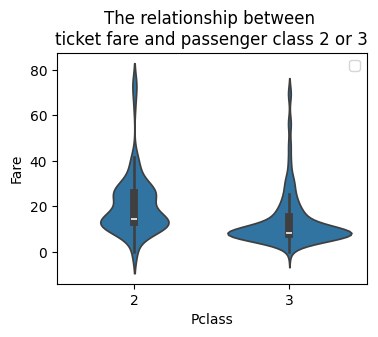

In [91]:
df_class_2_3 = df[(df['Pclass'] == 2) | (df['Pclass'] == 3)]
df_class_2_3

plt.figure(figsize=(4,3))

sns.violinplot(x=df_class_2_3['Pclass'], y=df_class_2_3['Fare'])

plt.title("The relationship between \nticket fare and passenger class 2 or 3")
plt.xlabel("Pclass")
plt.ylabel("Fare")
plt.legend() #mikra

plt.show()
